In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [78]:
features = np.array([[50, 100], [50,100]])

In [79]:
def generate_item(features) :
    item = []
    for feature in features :
        item.append(np.random.uniform(*feature, 1)[0])
    return np.array(item)

In [80]:
generate_item(features)

array([96.62366934, 54.87577478])

In [81]:
# random.randrange(start=5, stop=20, step=1, _int='float')

In [82]:
def gen_population(features, n=100) :
    population = []
    
    for i in range(n) :
        population.append(generate_item(features))
    return np.array(population)

In [89]:
population = gen_population(features, 100)
population

array([[85.23631894, 71.2924707 ],
       [56.0206544 , 78.01421801],
       [63.95294935, 90.60126808],
       [65.89587126, 77.27513374],
       [71.59881132, 85.31001635],
       [66.5603106 , 70.20929579],
       [77.59385653, 98.24279235],
       [67.23784184, 61.42033049],
       [99.5488638 , 72.47950604],
       [66.79458301, 90.24247494],
       [87.50524939, 99.59565993],
       [59.57261766, 65.79163972],
       [70.3856589 , 52.61057775],
       [67.10065373, 69.85572001],
       [92.53576946, 91.67603993],
       [98.95020588, 68.45838531],
       [72.78266204, 69.34013533],
       [51.67459545, 64.11523191],
       [56.08393337, 85.20464256],
       [82.57665403, 91.7452034 ],
       [89.91472818, 62.66849046],
       [71.87593168, 76.7045227 ],
       [98.94277429, 82.14265633],
       [62.09167241, 66.12414705],
       [69.46975897, 63.91511404],
       [80.80516252, 57.30522061],
       [78.48663418, 97.9248893 ],
       [51.13432263, 68.42258357],
       [82.21032979,

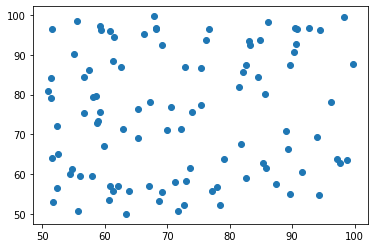

In [84]:
plt.scatter(population[:,0], population[:,1])

In [154]:
prof = [(np.array([75, 60]), 10), (np.array([60, 75]), 10)]

np.array(prof)[:,0][0]

array([75, 60])

In [163]:
# def fitness1(population, prof) :
#     distance = []
#     for human in population :
#         p1 = prof[0][0] - human 
#         p2 = prof[1][0] - human
#         d1 = p1[0]**2 + p1[1]**2
#         d2 = p2[0]**2 + p2[1]**2
#         distance.append(np.min([d1,d2]))
#     return np.array(distance)

In [172]:
def fitness(population, prof) :
    prof_loc = np.array(prof)[:,0]
    prof_pow = np.array(prof)[:,1]
    fitness = np.zeros([len(population), 0])
    
    for loc in prof_loc :
        out = np.hstack([fitness, np.sum((population - loc) ** 2, axis=1, keepdims=True)])
        fitness = np.hstack([fitness, out])
    return np.min(fitness, axis=1)

In [173]:
fit_ness = fitness(population, prof)

In [181]:
def get_selected(population, prof, factor=2) :
    fit = fitness(population, prof)
    selected_idx = np.argsort(fit)[ : len(population) // factor]
    return population[selected_idx]
    

In [236]:
selected = get_selected(population, prof, 20)

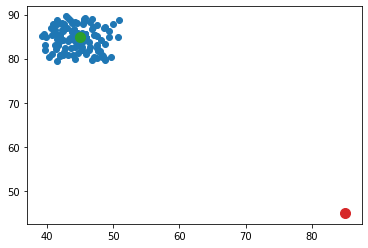

In [237]:

plt.scatter(population[:,0], population[:,1])
plt.scatter(selected[:,0], selected[:,1])

for p in prof :
    p_loc = p[0]
    plt.scatter(p_loc[0], p_loc[1], s=100)

In [238]:
def mutate(item) :
    return item + np.random.uniform(-5, 5, 2)

In [239]:
def cross(population, n=100) :
    gen=[]
    for i in range(n) :
        item = np.zeros(population.shape[1])
        parents = random.choices(population, k=2)
        item[0] = parents[0][0]
        item[1] = parents[1][1]
        gen.append(mutate(item))
        gen.append(random.choice(parents))
    return np.array(gen)

In [240]:
def display(population, prof) :
    plt.figure()
    plt.xlim(0,100)
    
    plt.ylim(0,100)
    
    plt.scatter(population[:,0], population[:,1])
    for p in prof :
        p_loc = p[0]
        plt.scatter(p_loc[0], p_loc[1], s=100)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


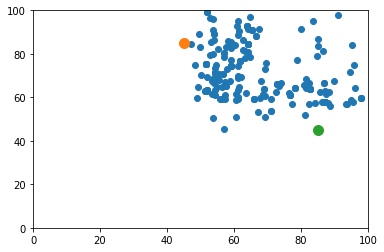

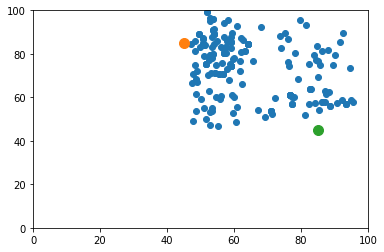

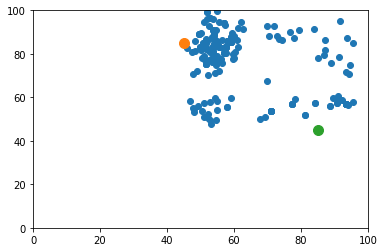

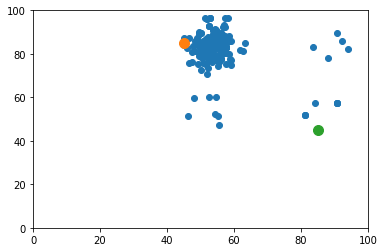

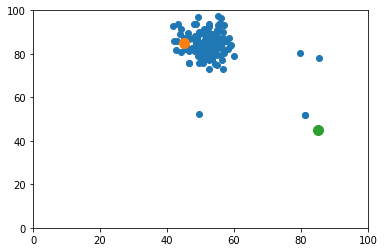

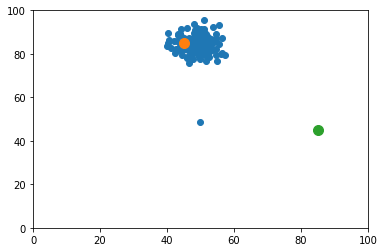

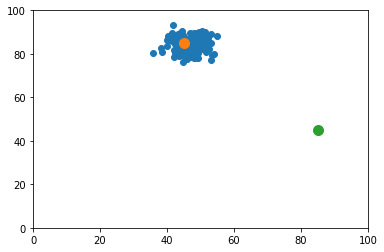

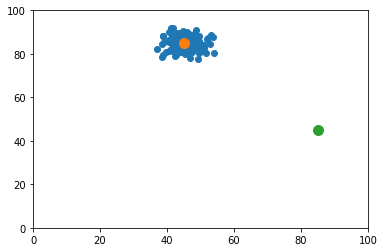

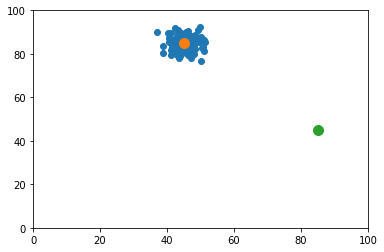

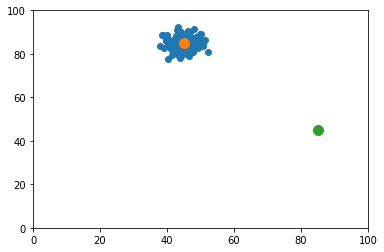

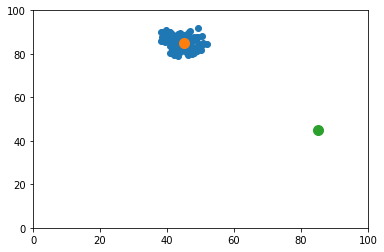

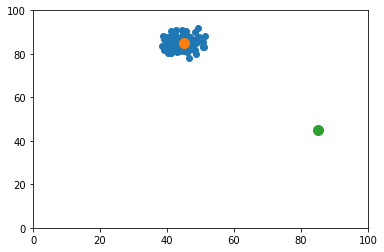

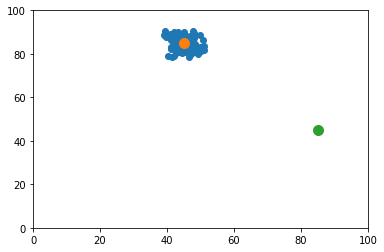

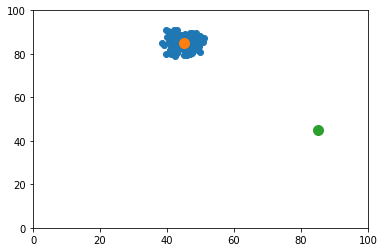

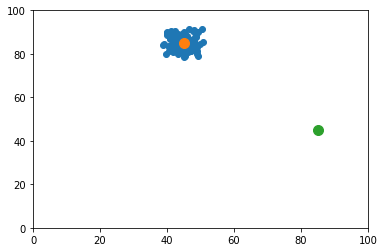

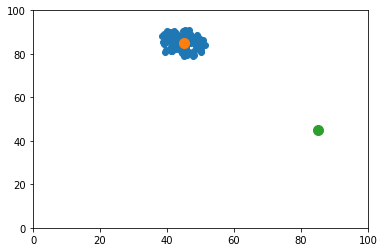

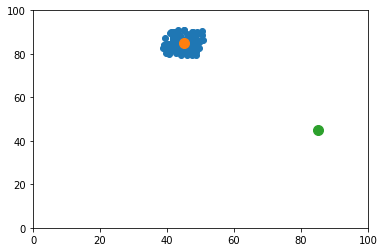

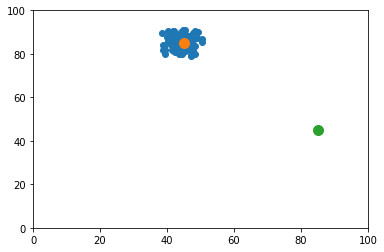

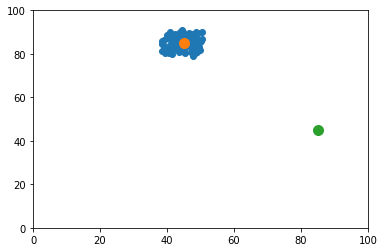

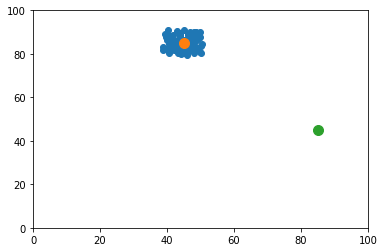

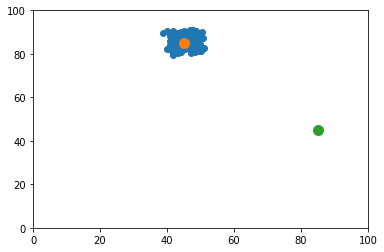

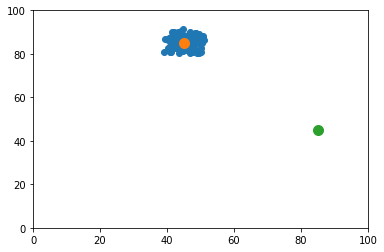

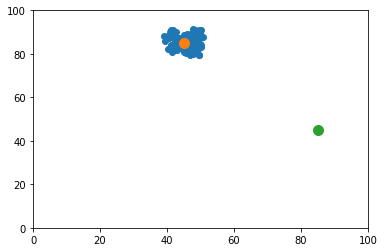

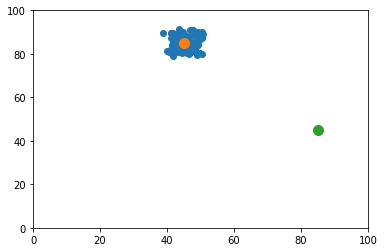

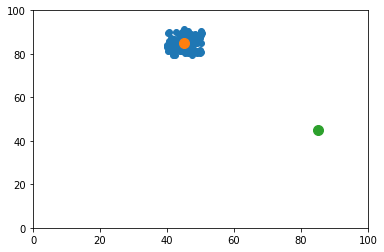

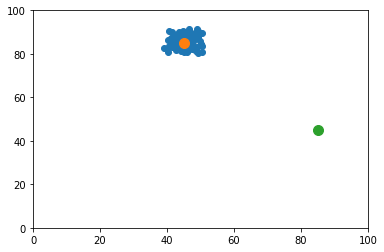

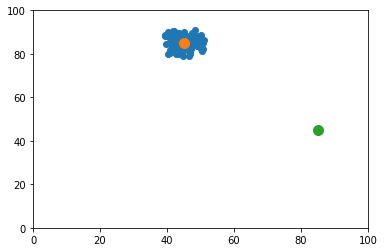

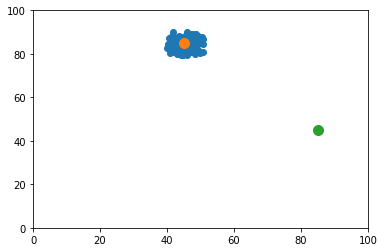

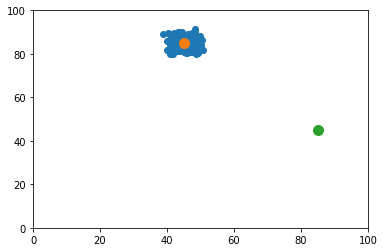

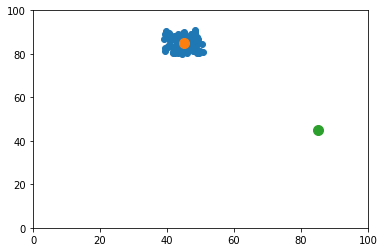

In [241]:
features = np.array([[50, 100], [50,100]])
population = gen_population(features)
prof = [(np.array([45, 85]), 10), (np.array([85, 45]), 10)]
for i in range(30) :
    selected = get_selected(population, prof)
    population = cross(selected)
    display(population, prof)

In [2]:
# ! pip3 list

In [127]:
p1 = np.sum((prof[0][0] - population[0])**2)

In [191]:
np.zeros(population.shape[1])

array([0., 0.])

In [129]:
dist = fitness(population, prof)

In [141]:
np.sort(dist[:1][:])

array([[  0.        , 232.30212009]])